In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
## Importing the Libraries

import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import math
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [3]:
## Importing the data

df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
## Getting the data

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.head(10).style.background_gradient(cmap = "viridis")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

###### There are 1460 rows and 81 columns in this dataset

In [6]:
## Basic Checks

df.head()  ## getting first five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.tail() ## getting last five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
df.describe().transpose().style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [9]:
df.info() ## getting the information from the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

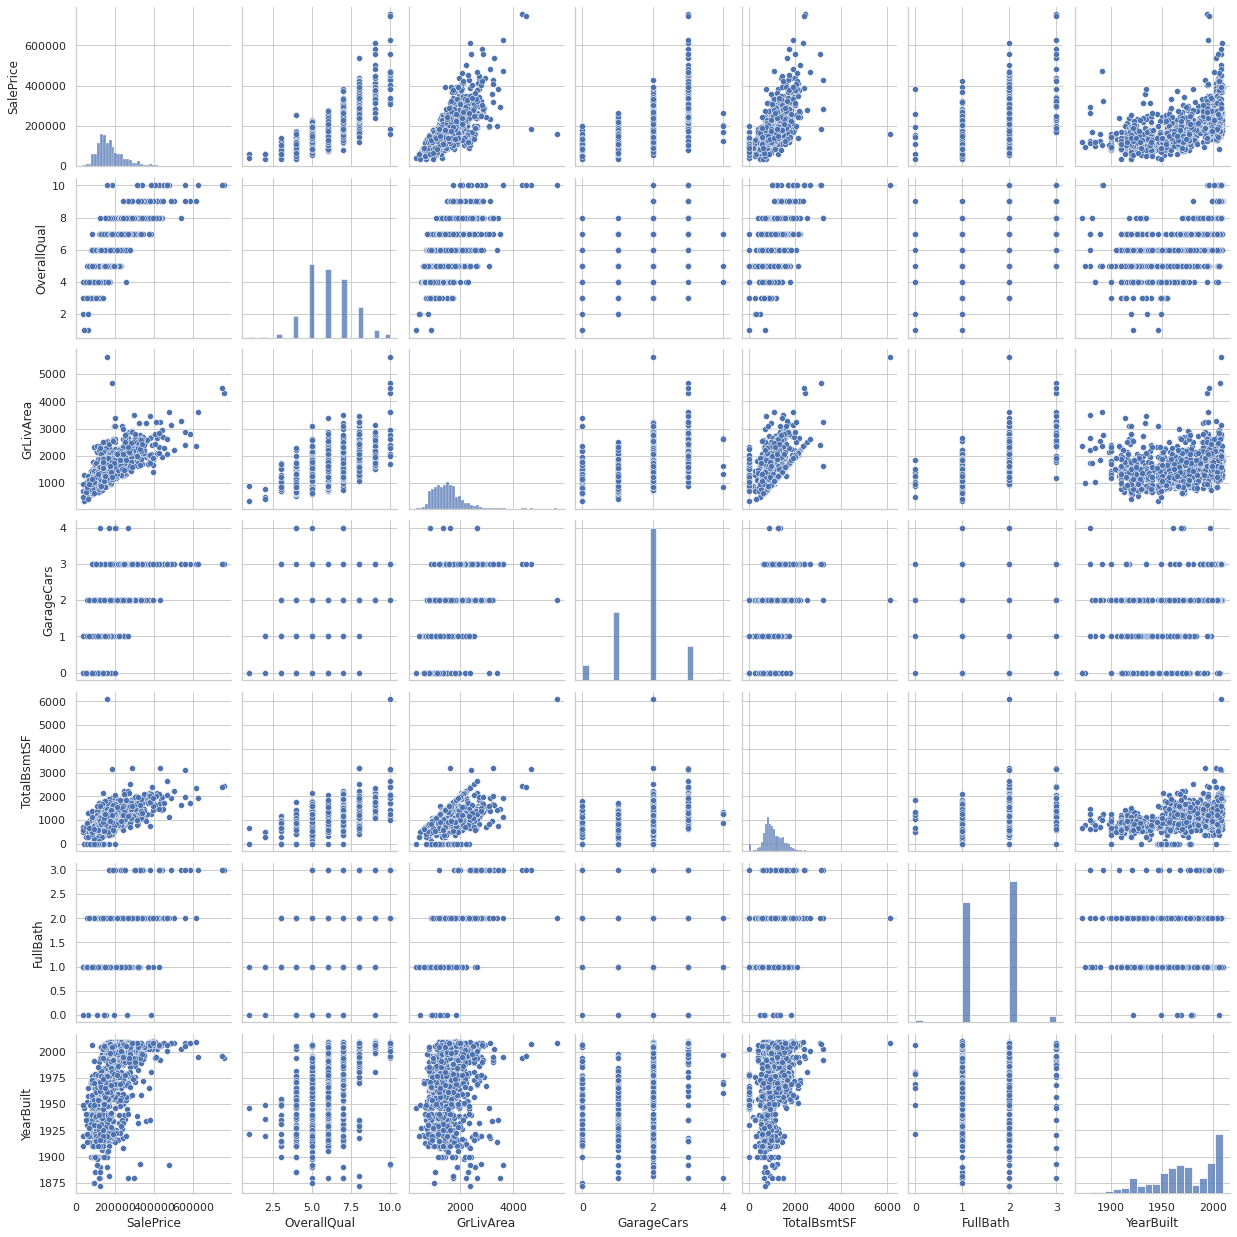

In [10]:
var_num = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(df[var_num]);

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

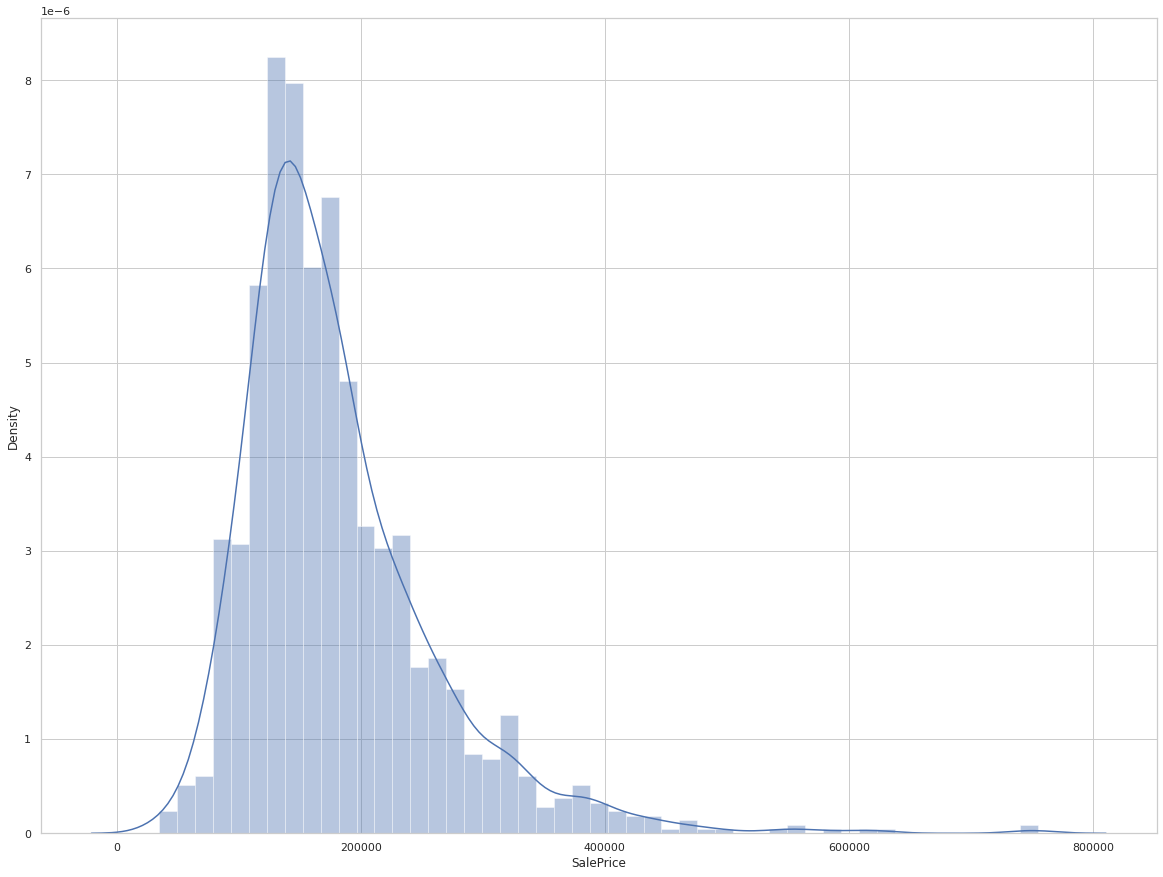

In [11]:
sns.distplot(df["SalePrice"])

In [12]:
df["SalePrice"].describe()  ##There is a huge difference between the min and max..

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

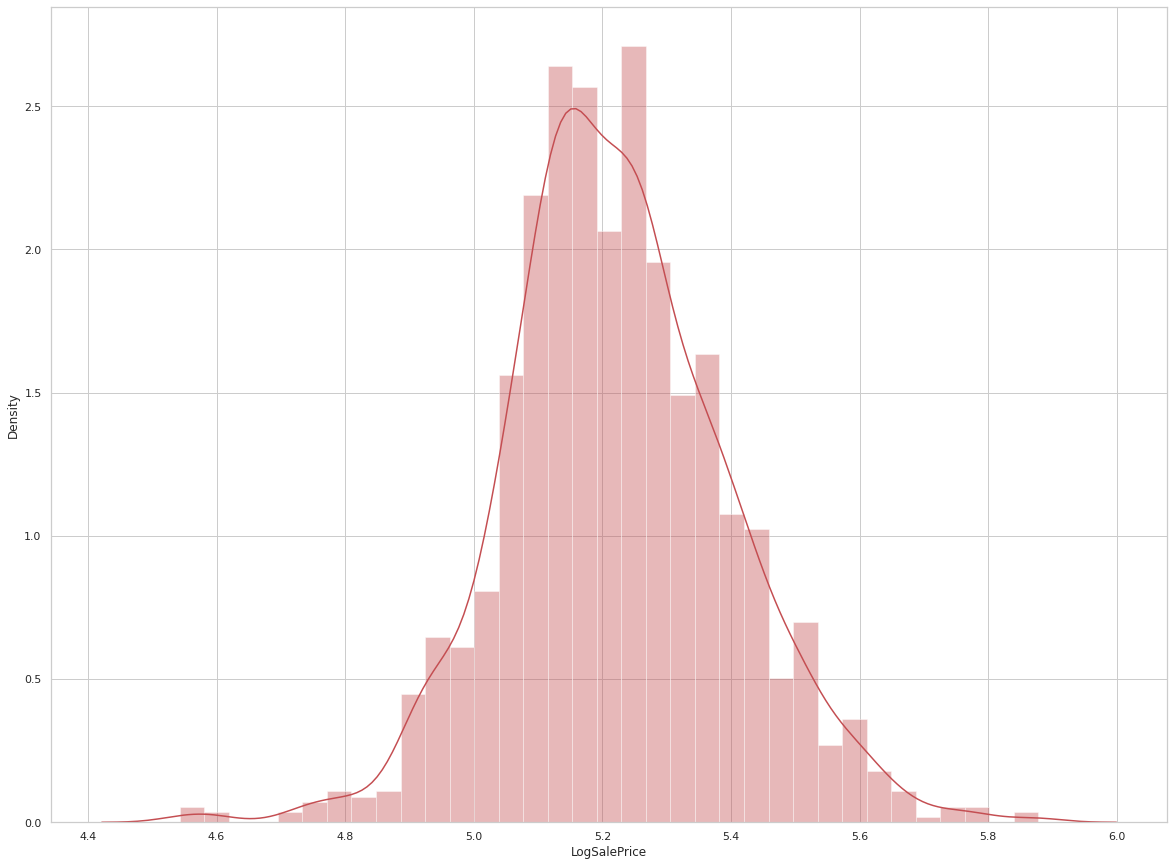

In [13]:
df["LogSalePrice"] = np.log10(df["SalePrice"])
sns.distplot(df["LogSalePrice"],color = 'r')

In [14]:
## checking if there is any duplicate data

df.duplicated().sum()

0

###### There is no duplicate data

In [15]:
## Analysing if there is any null values

pd.options.display.max_rows=None ## shows all the rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

###### We have null values in the dataset
###### There are 19 columns with null values

In [16]:
#pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Handling the missing values and Feature selection

###### Handling missing values for LotFrontage



In [17]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

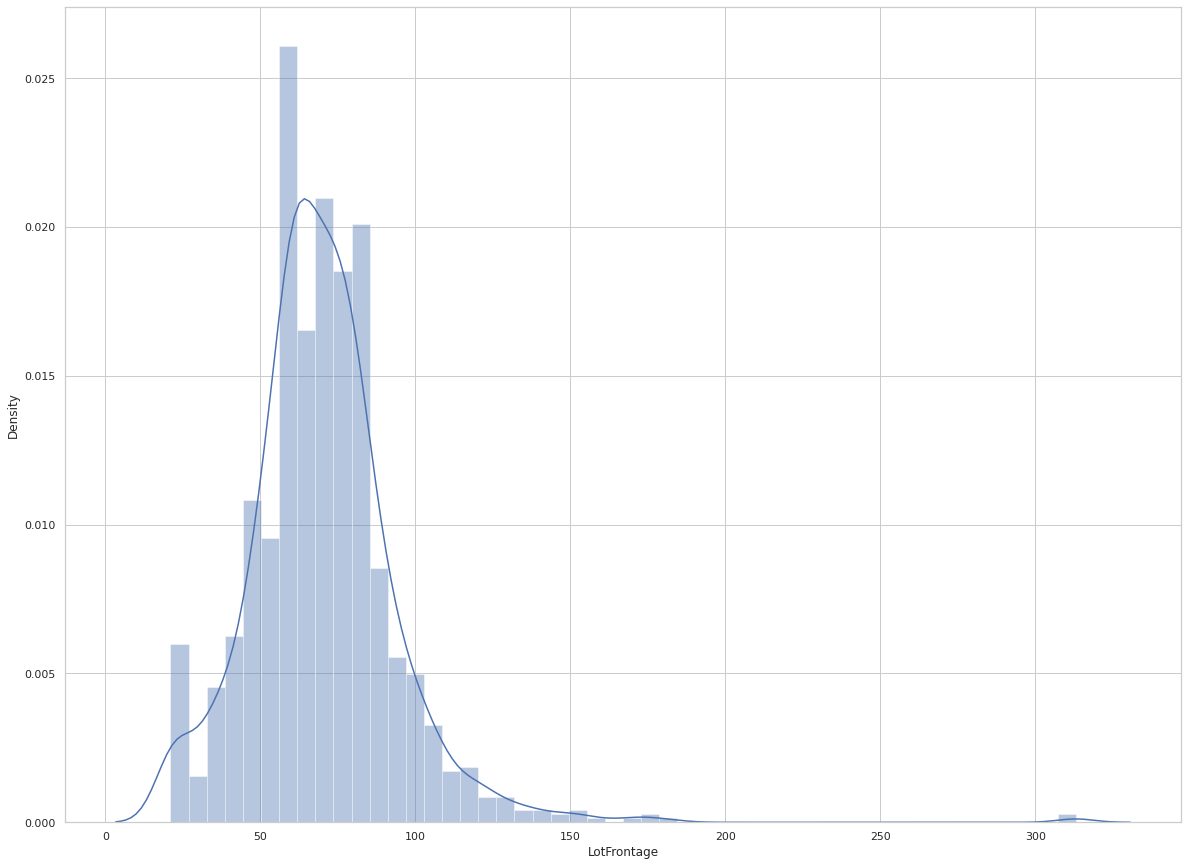

In [18]:
## distribution plot for LotFrontage
 
sns.distplot(df.LotFrontage)
plt.show()

In [19]:
df['LotFrontage'].mean()  ## getting the mean

70.04995836802665

In [20]:
## Checking the percentage of missing values for LotFrontage

print('The Percentage of data missing in LotFrontage is ',df.LotFrontage.isnull().sum()/len(df)*100)

The Percentage of data missing in LotFrontage is  17.73972602739726


In [21]:
df.loc[df['LotFrontage'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,5.301030
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,5.158362
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,5.195900
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,5.173186
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,5.187521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2007,WD,Normal,182900,5.262214
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143750,5.157608
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,149300,5.174060
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,WD,Normal,121000,5.082785


In [22]:
## Replacing the nan values with mean for LotFrontage

df.loc[df['LotFrontage'].isnull()==True,'LotFrontage']=70.0

###### Handling the missing values for Alley,PoolQC,Fence,MiscFeature


In [23]:
## Percentage of missing values in Alley,PoolQC,Fence,MiscFeature
 
d1=df[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a


Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

##### More than 80% of the data are missing in Alley,PoolQC,Fence,MiscFeature

In [24]:
## removing the features

df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

###### Handling the missing values for BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

In [25]:
## Percentage of missing values

d2=df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
b

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [26]:
## Replacing the missing values with 'NA'

df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')


###### Replacing missing values for MasVnrType

In [27]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
## Replacing the missing values with mode

df.loc[df['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [29]:
###### Replacing missing values for MasVnrArea

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

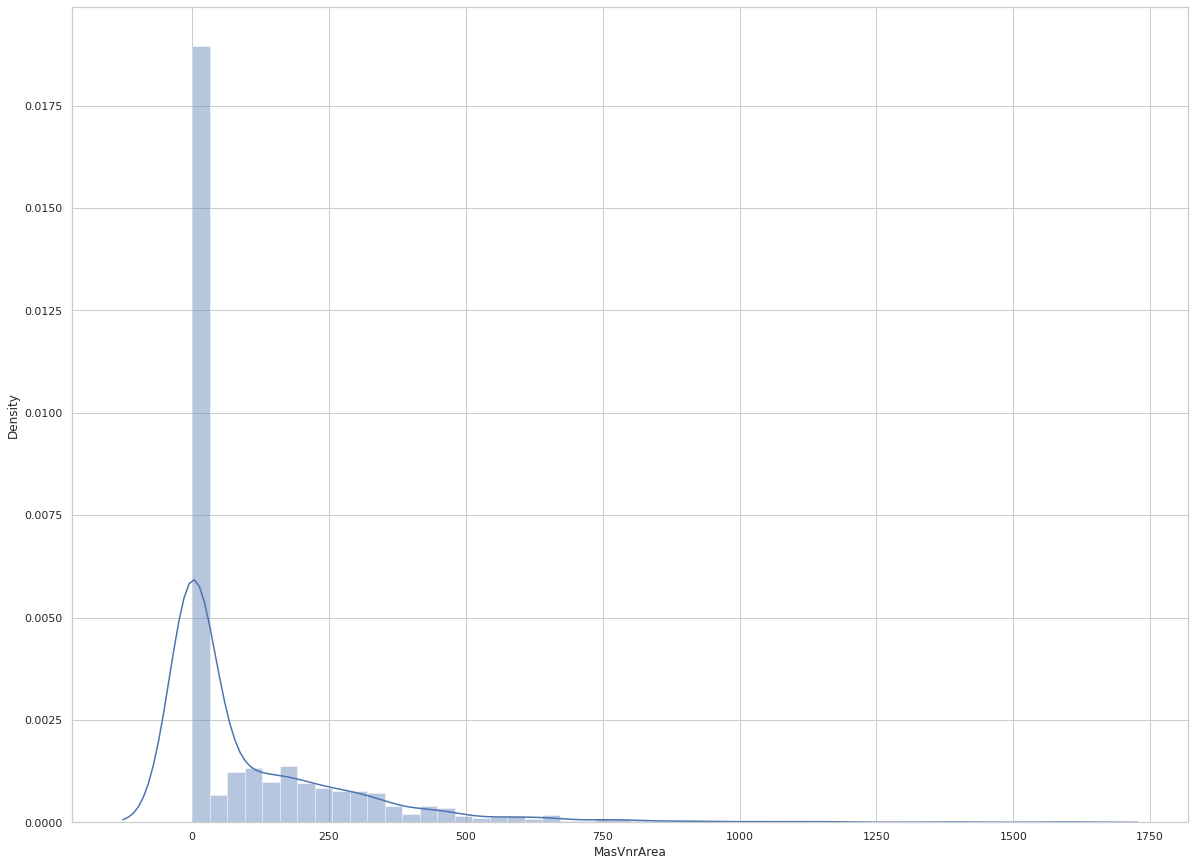

In [30]:
 sns.distplot(df.MasVnrArea)

In [31]:
## Finding the median

df['MasVnrArea'].median()

0.0

In [32]:
## Replacing the missing value by median
df.loc[df['MasVnrArea'].isnull()==True,'MasVnrArea']=0.0

###### Handling missing values for GarageType,GarageFinish,GarageQual,GarageCond 

In [33]:
## Percentage of missing values
d3=df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
c


GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [34]:
## Replacing the missing values for GarageType,GarageFinish,GarageQual,GarageCond  by NA

df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')



###### Handling the missing value for GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

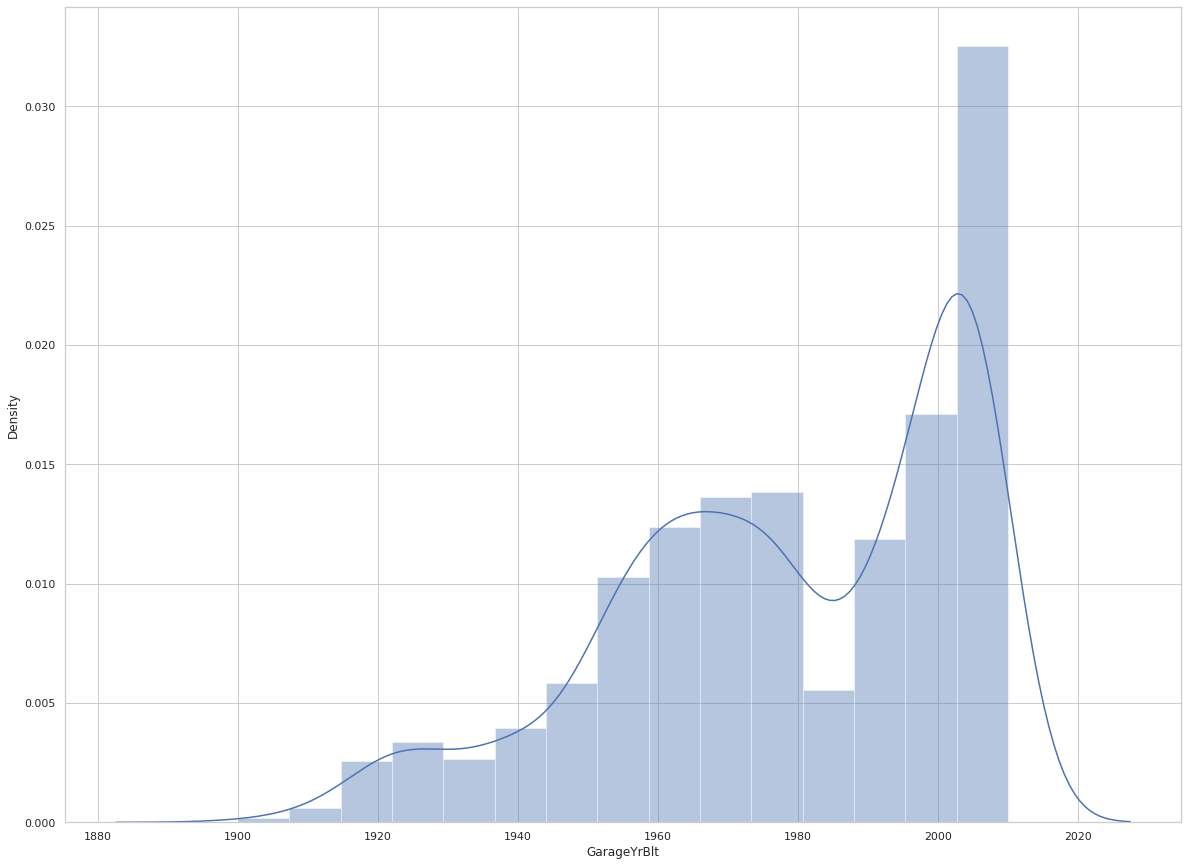

In [35]:
sns.distplot(df.GarageYrBlt)

In [36]:
df.GarageYrBlt.median()

1980.0

In [37]:
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1980.0

###### Handling the missing value for Electrical          

In [38]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
## Replacing the null values with mode
df.loc[df['Electrical'].isnull()==True,'Electrical']='SBrkr'

###### Handling the missing values for FireplaceQu

In [40]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [41]:
## Replacing the missing values with NA
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [42]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
LogSalePrice     0
Length: 78, dtype: int64

###### There is no null values now.We have cleared all the null values.

**Question 1: What features correlates the most with the Sale Price of the house?**

In [43]:
## Lets create a list of column names for categorical and numerical features

cate_feat = list(df.select_dtypes(include = [object]).columns)
num_feat = list(df.select_dtypes(include = [int,float]).columns)

print(cate_feat)
print('\n')
print(num_feat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

Text(0.5, 1.0, 'SalePrice Correlation')

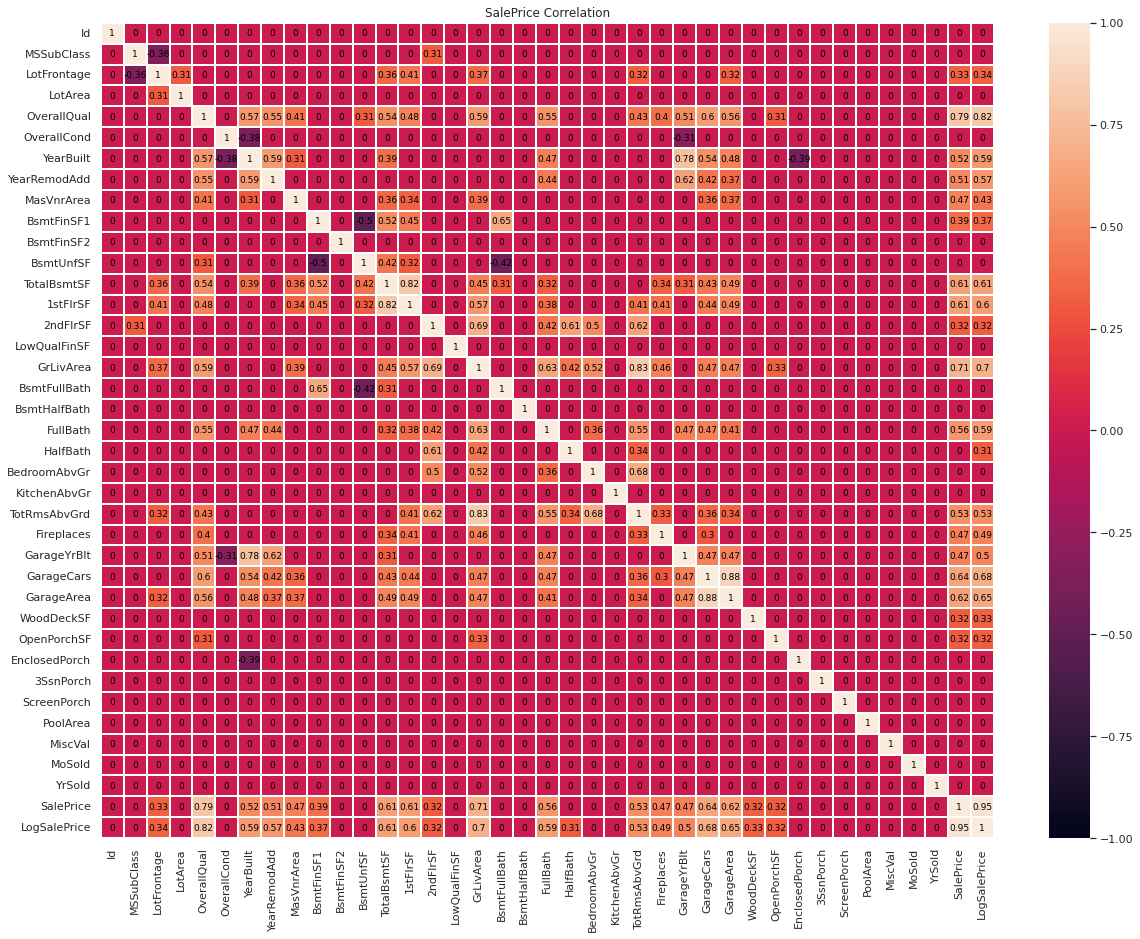

In [44]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df[num_feat].corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"},annot=True)
plt.title("SalePrice Correlation")

We can see that, The overall quality of the house and Ground living Area has 0.79 and 0.74 correlation with the SalePrice of the house, followed by Garagecars with 0.64 correlation.

In [45]:
## Lets visualize individually 

corr =df.corr()["SalePrice"].sort_values(ascending = False)[2:8] ## selecting cols other than Saleprice, LogPrice
corr

OverallQual   0.79
GrLivArea     0.71
GarageCars    0.64
GarageArea    0.62
TotalBsmtSF   0.61
1stFlrSF      0.61
Name: SalePrice, dtype: float64

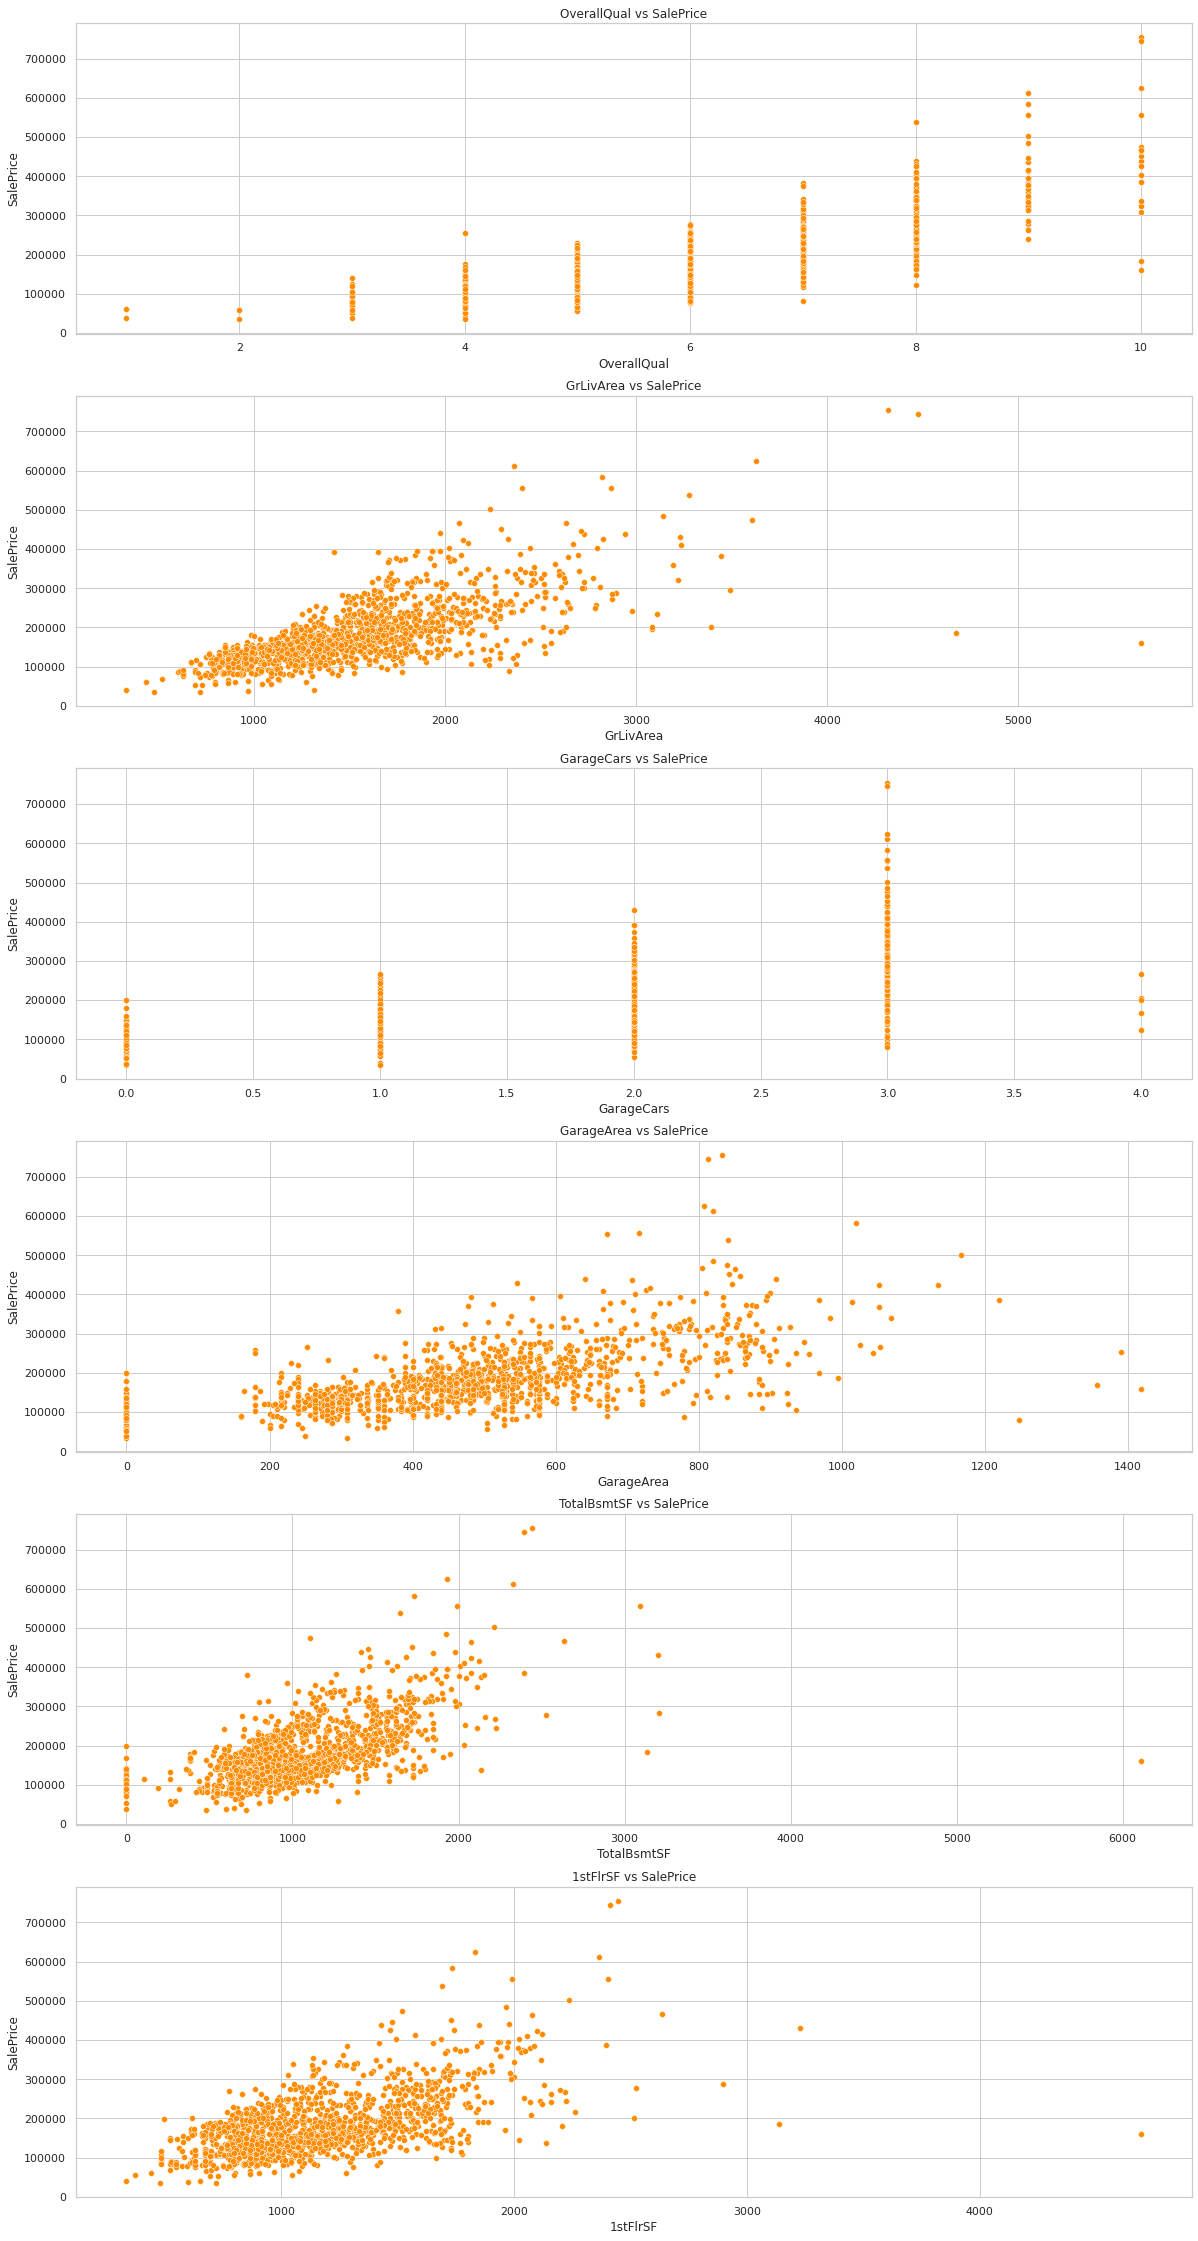

In [46]:
f,ax = plt.subplots(nrows = 6,ncols = 1, figsize = (20,40))
for i,col in enumerate(corr.index):    
    sns.scatterplot(x = col, y = "SalePrice", data = df, ax = ax[i], color = 'darkorange')
    ax[i].set_title(f'{col} vs SalePrice')

We can see the features above are quite linear to the Sale Price suggesting positive correlation

**Question 1: What year were most of the houses built (Top 10), and does the year built say anything regarding the sale price?**

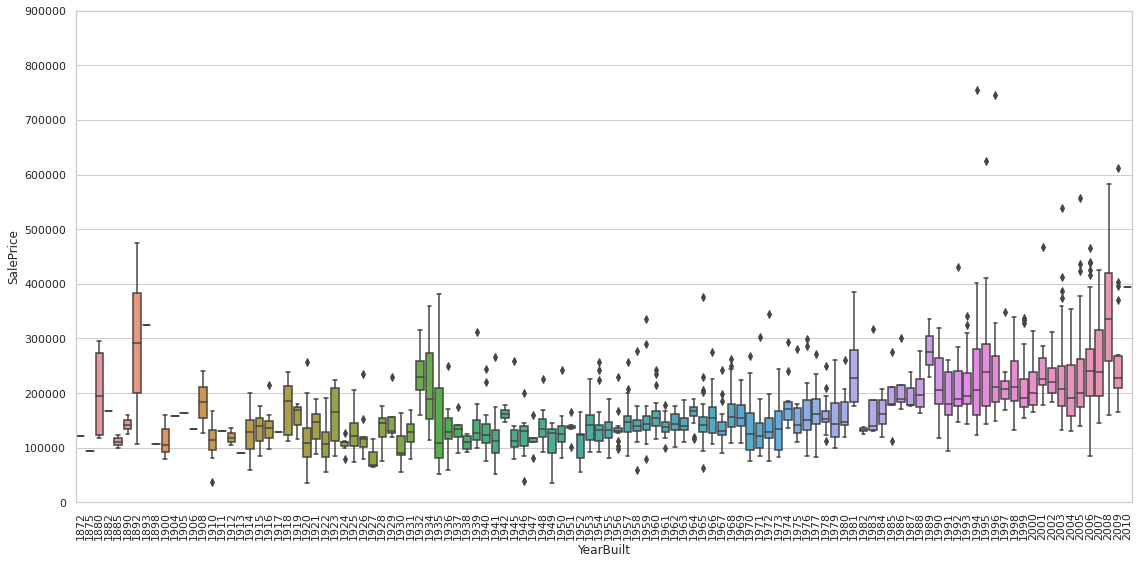

In [47]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df,)
fig.axis(ymin=0, ymax=900000);
plt.xticks(rotation=90);
plt.tight_layout()

Text(0.5, 1.0, 'Year Built')

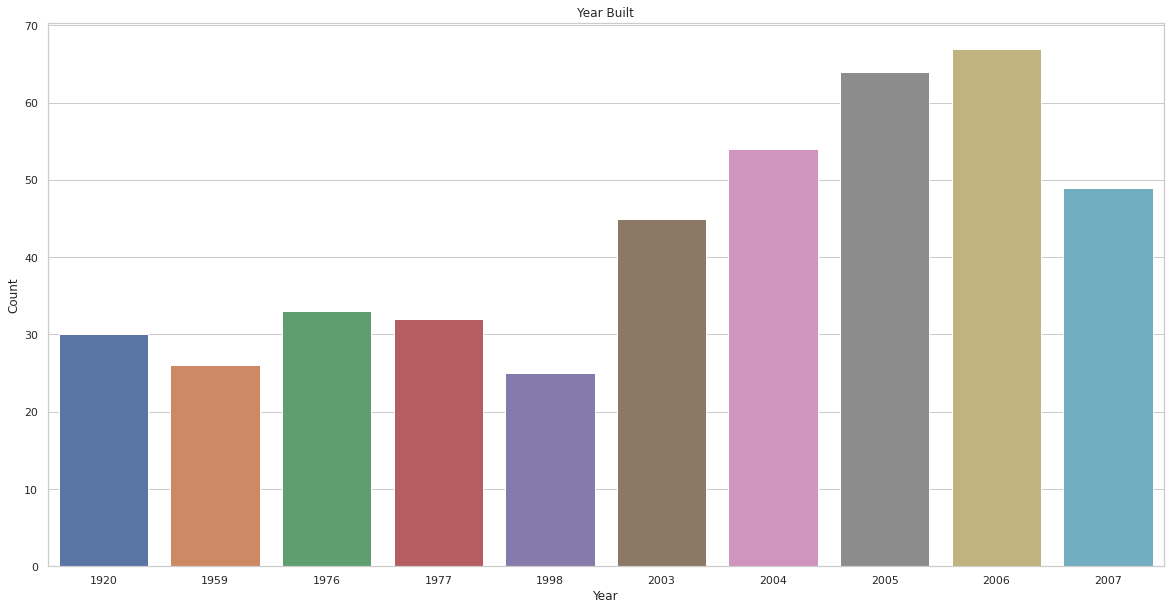

In [48]:
yr_built = pd.DataFrame({"Count":df["YearBuilt"].value_counts()[:10]}).reset_index()
yr_built.rename(columns={'index':'Year'},inplace=True)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y = "Count", data = yr_built)
plt.title("Year Built")

<AxesSubplot:xlabel='MoSold'>

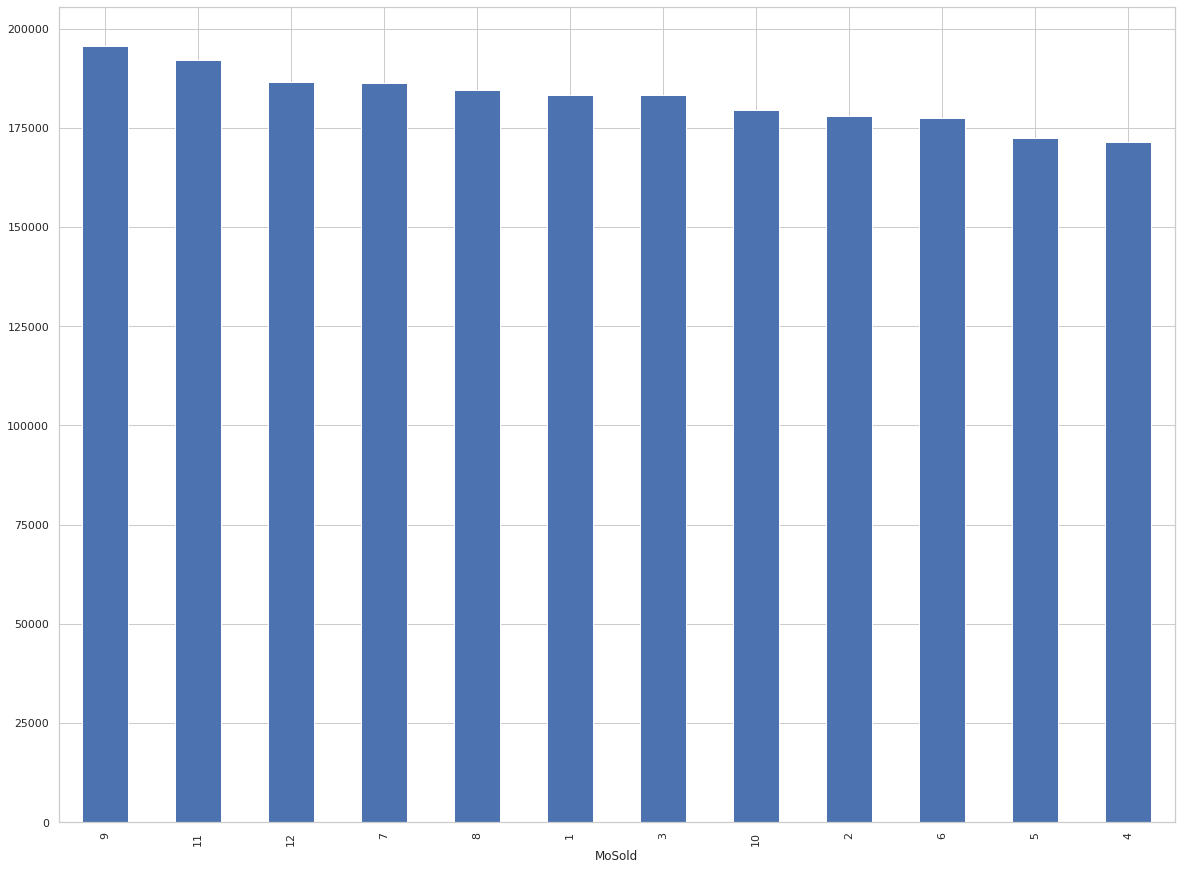

In [49]:
## As a side question, lets see if there is a huge difference in sale price based on different months

df.groupby("MoSold").mean()["SalePrice"].sort_values(ascending = False).plot(kind = 'bar')

# Exploratory Data Analysis

### Univarient Analysis

In [50]:
## Getting the features with object datatype
dtype_objects = list(columns for columns in df.select_dtypes([object]).columns)


In [51]:
dtype_objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [52]:
len(dtype_objects)

39

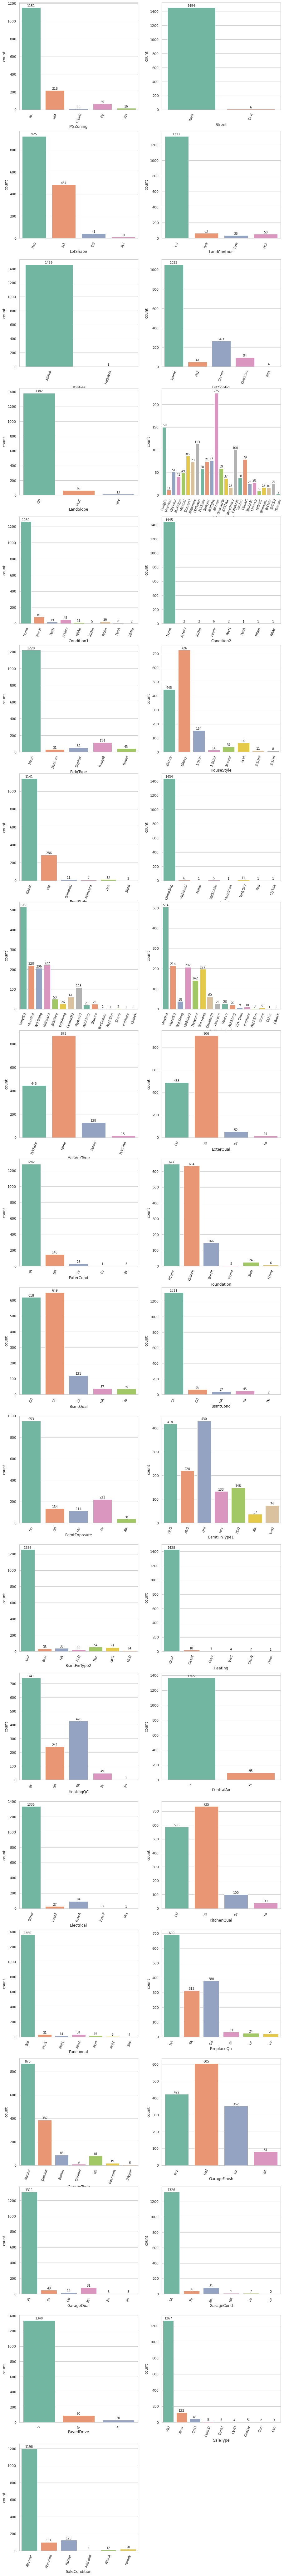

In [53]:
## countplot for datatype with objects

plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=df[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

###### Count plot for the datatype object has been plotted

In [54]:
## Getting the features with float datatype

dtype_float =list(columns for columns in df.select_dtypes([float]).columns)

In [55]:
dtype_float

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LogSalePrice']

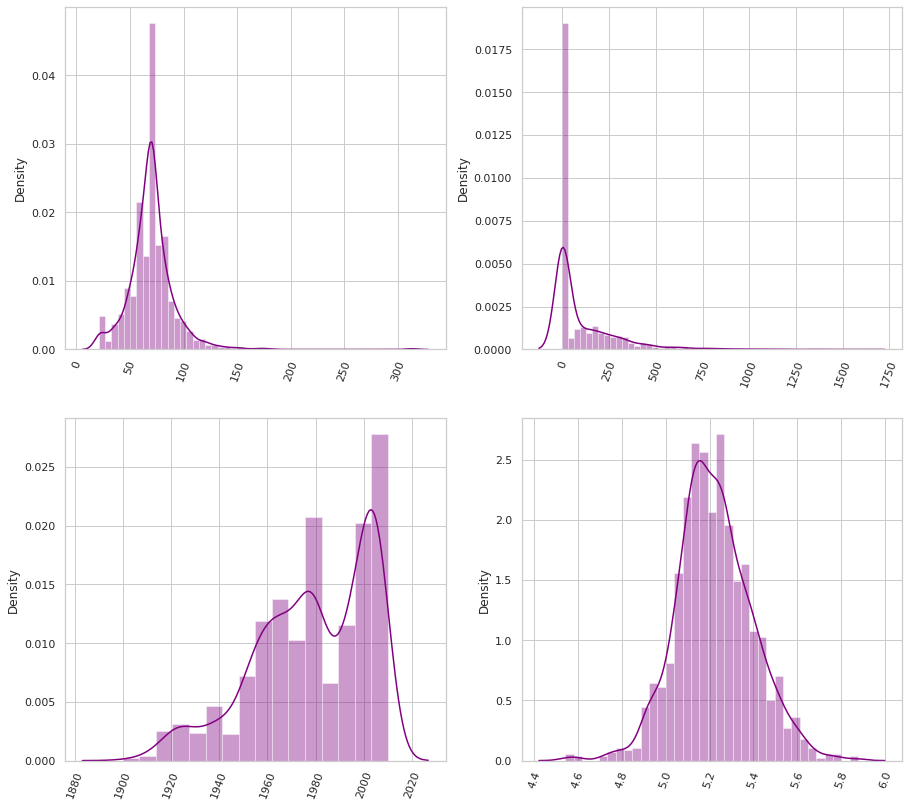

In [56]:
## Distribution plot 

plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=df[a],color='purple')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show() 

###### From the graph LotFrontage gives normal distribution but MasVnrArea and GarageYrBlt is skewed

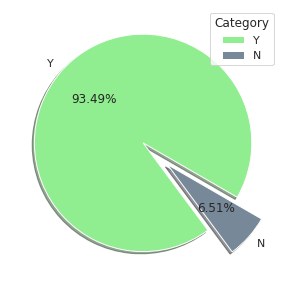

In [57]:
## Pie plot for CentralAir

plt.figure(figsize=(5,5))
labels=['Y','N']
size=df['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

###### From the graph 93.49% houses has CentralAir and 6.51% houses has no CentralAir

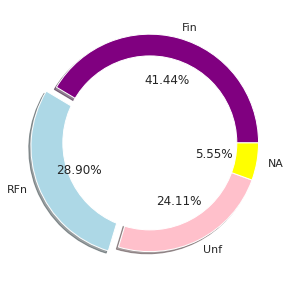

In [58]:
## Donut chart for GarageFinish

plt.figure(figsize=(5,5))
labels=['Fin','RFn','Unf','NA']
size=df['GarageFinish'].value_counts()
colors=['purple','lightblue','pink','yellow']
explode=[0,0.1,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

###### From the graph for 41.44% of the houses the interior finish of the garage is finished.

# **Bivarient and Multivarient Analysis**

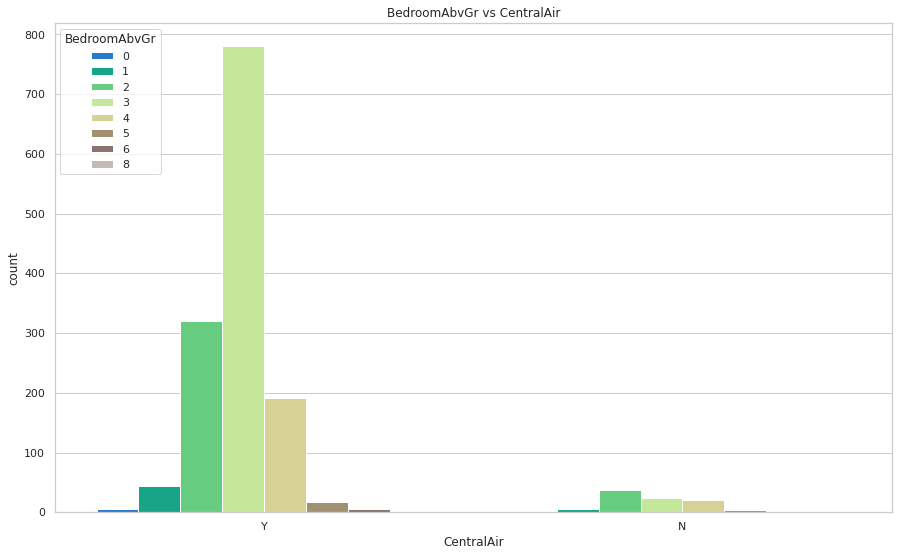

In [59]:
## Countplot for CentralAir and BedroomAbvGr

plt.figure(figsize=(15,9))
sns.countplot(x='CentralAir',hue='BedroomAbvGr',palette='terrain',data=df).set(title="BedroomAbvGr vs CentralAir")
plt.show()

### The houses with 3 bedrooms has more central air conditioning than others.

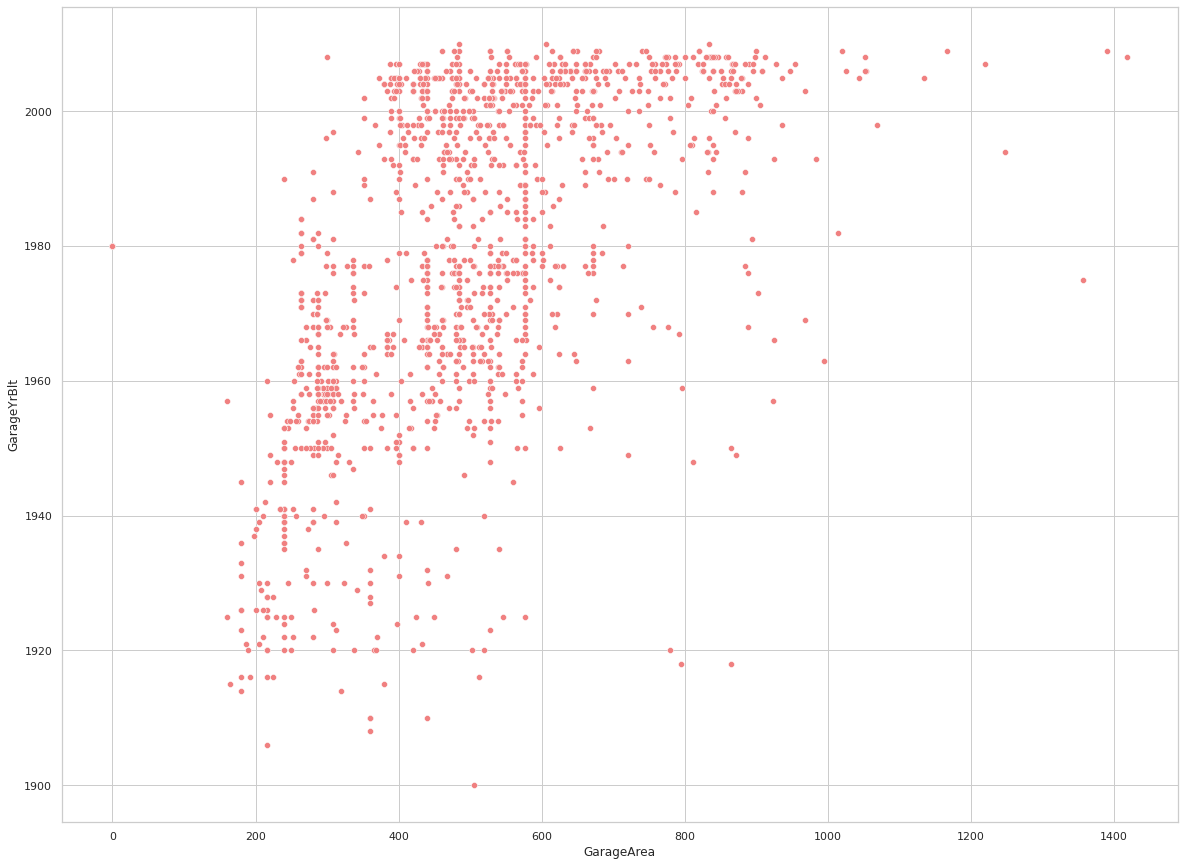

In [60]:
## Scatter plot for GarageArea and GarageYrBlt

sns.scatterplot(x='GarageArea',y='GarageYrBlt',data=df,color='lightcoral')
plt.show()

**We can see there are some outliers present while comparing garage area and garage year built**

In [61]:
data=df

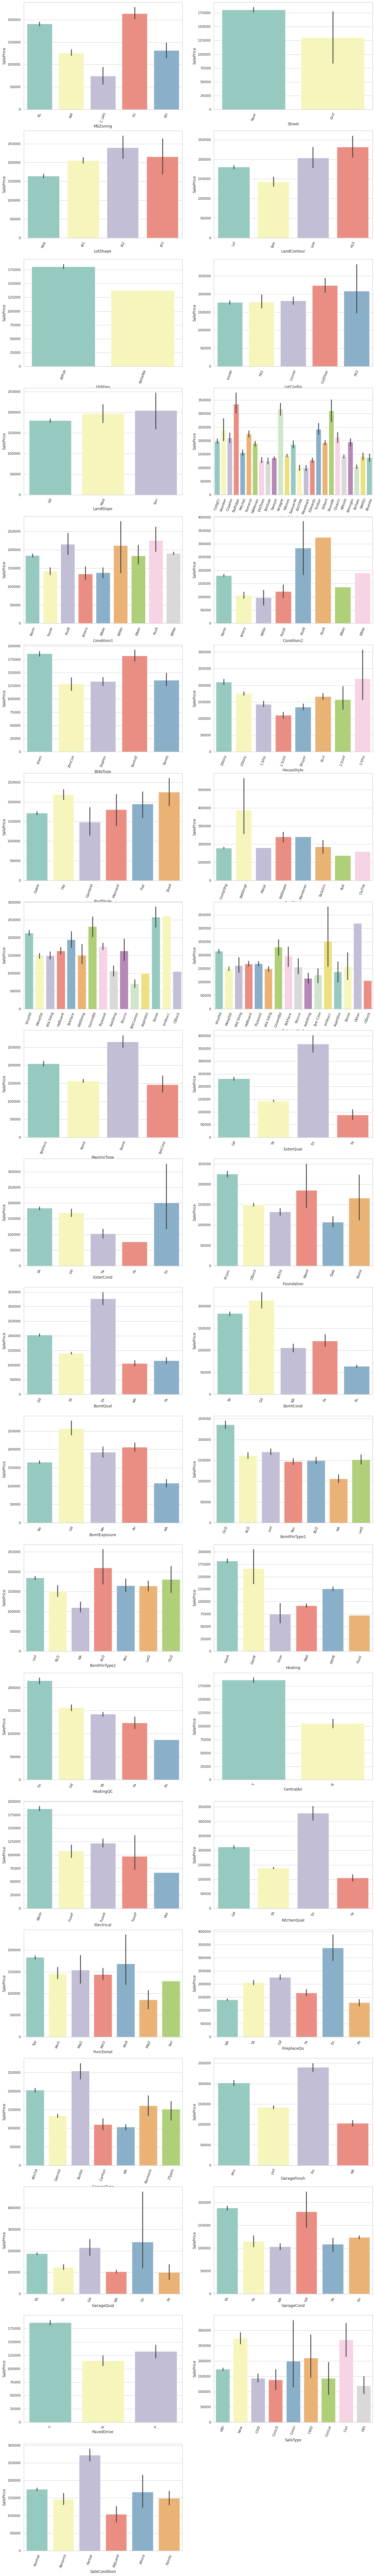

In [62]:
## barplot for saleprice and the data type with objects

plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

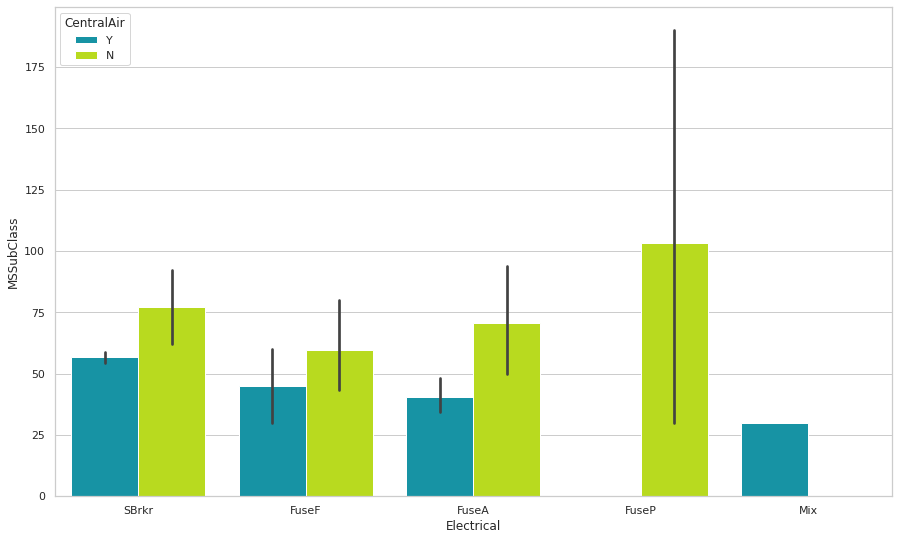

In [63]:
## bar plot for Electrical,MSSubClass,CentralAir

plt.figure(figsize=(15,9))
splot=sns.barplot(x='Electrical',y='MSSubClass',hue='CentralAir',palette='nipy_spectral',data=data)
plt.show()

**Building with 2-STORY 1946 & NEWER and Standard Circuit Breakers & Romex use more central air conditioning than others.**

In [64]:
## Getting the continuous data features

box=df[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

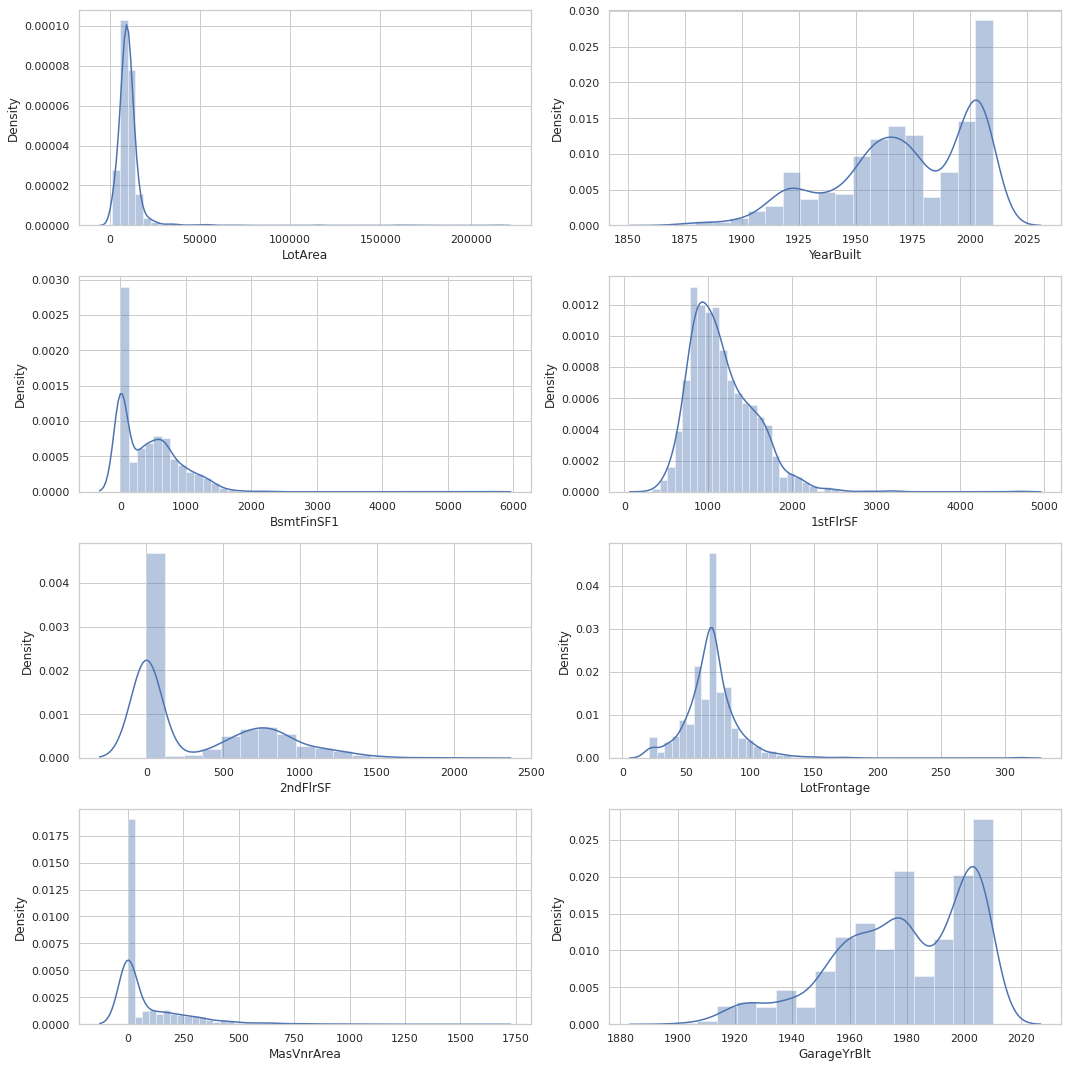

In [65]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   

# Finding the outliers

In [66]:
## getting the continuous data features

box=df[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [67]:
box

,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.00,196.00,"2,003.00"
1,9600,1976,978,1262,0,80.00,0.00,"1,976.00"
2,11250,2001,486,920,866,68.00,162.00,"2,001.00"
3,9550,1915,216,961,756,60.00,0.00,"1,998.00"
4,14260,2000,655,1145,1053,84.00,350.00,"2,000.00"
...,...,...,...,...,...,...,...,...
1455,7917,1999,0,953,694,62.00,0.00,"1,999.00"
1456,13175,1978,790,2073,0,85.00,119.00,"1,978.00"
1457,9042,1941,275,1188,1152,66.00,0.00,"1,941.00"
1458,9717,1950,49,1078,0,68.00,0.00,"1,950.00"


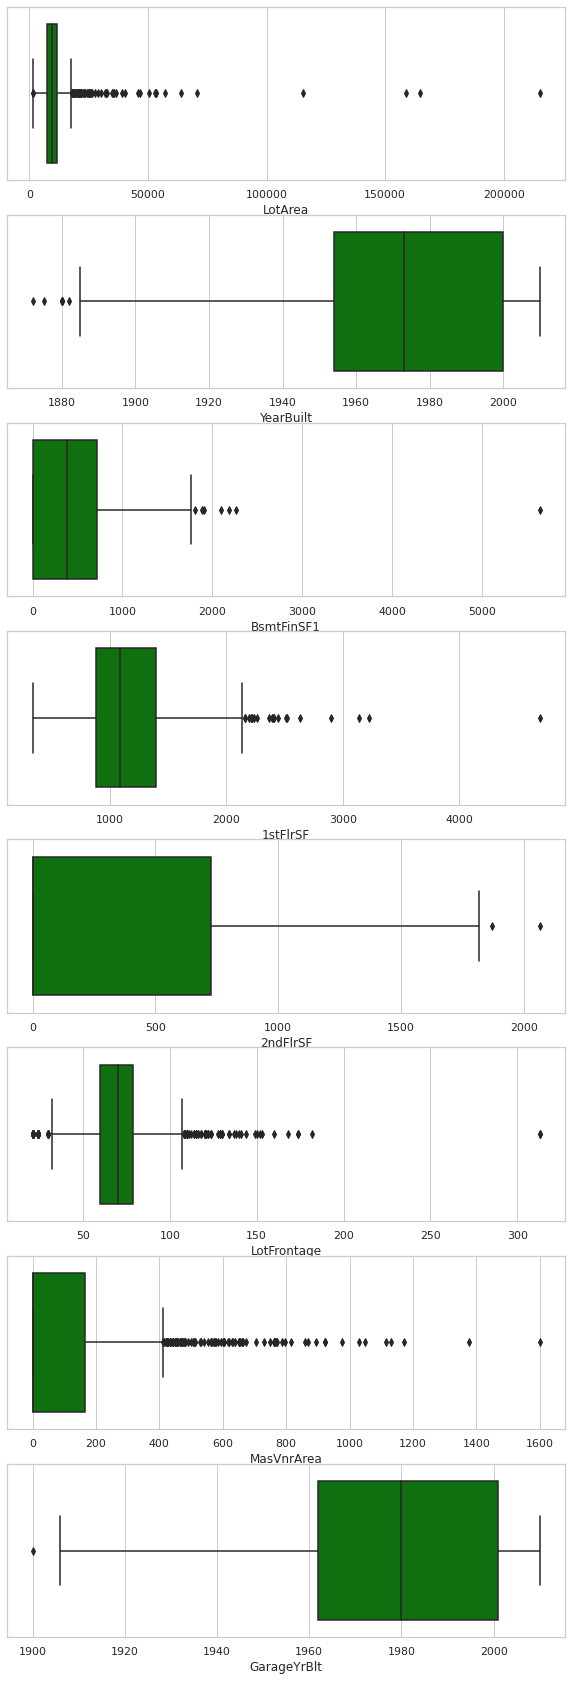

In [68]:
## boxplot to find the outliers

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(data[c],color='green')
    plotnumber=plotnumber + 1 
plt.show()

# Handling the skewness

In [69]:
from scipy.stats import skew

numerical_features = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# checking the head of skewness dataset
skewness

,skew
MiscVal,24.45
PoolArea,14.81
LotArea,12.20
3SsnPorch,10.29
LowQualFinSF,9.00
KitchenAbvGr,4.48
BsmtFinSF2,4.25
ScreenPorch,4.12
BsmtHalfBath,4.10
EnclosedPorch,3.09


In [70]:
##applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    df[features] += 1
    df[features] = boxcox1p(df[features], lamda)
df[skewed_features] = np.log1p(df[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 39 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


### Changing categorical data to numerical data

In [71]:
#getting all the categorical feature

data_object = df.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [72]:
#Label Encoding to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    df[features] = le.fit_transform(df[features].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# Feature Scaling

In [73]:
## Scaling the features
## Spliting the variables

x=df.drop(['Id','SalePrice'],axis=1) ## all the features
y=df['SalePrice']  ## target variable

In [74]:
#using minmax scaler to scale all the datas

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

## **Model Creation**

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=0)

print("Traning Shape = ",x_train.shape)  ## number of rows and columns  given for training
print('Testing Shape = ',x_test.shape)  ## number of row and columns given for testing

Traning Shape =  (1168, 76)
Testing Shape =  (292, 76)


# **Model Evaluation**
## Linear Regression

In [76]:
## importing the library

from sklearn.linear_model import LinearRegression

In [77]:
LR=LinearRegression()
LR.fit(x_train,y_train)  ## fitting the training data

x_test_pred_LR=LR.predict(x_test)  ## predicted x test

In [78]:
x_test_pred_LR

array([3.58225096, 3.51073145, 3.47679707, 3.57476195, 3.43600779,
       3.43058714, 3.64094753, 3.5206022 , 3.79807657, 3.5305856 ,
       3.58903708, 3.5133536 , 3.60258812, 3.49633842, 3.49144597,
       3.52558075, 3.57358263, 3.49816668, 3.53052435, 3.53754812,
       3.55020587, 3.52578819, 3.47791423, 3.55743616, 3.56887349,
       3.55205181, 3.56134753, 3.42981331, 3.66393621, 3.49095835,
       3.47625511, 3.59310777, 3.53806694, 3.62039416, 3.68710741,
       3.55840556, 3.63922834, 3.48062436, 3.62837988, 3.66478797,
       3.61418271, 3.50589042, 3.54898038, 3.63996597, 3.69948546,
       3.48975852, 3.4984038 , 3.50357549, 3.55653948, 3.43066761,
       3.70460304, 3.53847227, 3.55165969, 3.46097382, 3.63578788,
       3.49694587, 3.51018815, 3.6128836 , 3.51817865, 3.48449789,
       3.51651608, 3.5130942 , 3.51238947, 3.56367854, 3.576521  ,
       3.5396283 , 3.50907391, 3.60121882, 3.51841819, 3.60235501,
       3.57183799, 3.48859701, 3.4261631 , 3.69480319, 3.48052

In [79]:
y_test ## tested y

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [80]:
x_train_pred_LR=LR.predict(x_train) ##predicted x train

x_train_pred_LR

array([3.66059537, 3.47663109, 3.54662469, ..., 3.47932418, 3.60831821,
       3.59878531])

In [81]:
y_train  ## trained y

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [82]:
print('Linear Regression trainind score is',LR.score(x_train,y_train))

Linear Regression trainind score is 0.9998270692514184


In [83]:
print('Linear Regression testing score is',LR.score(x_test,y_test))

Linear Regression testing score is 0.9997997133114862


# Evaluation Metrics for Linear Regression

In [84]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,x_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9998270692514184


In [85]:
test_score=r2_score(y_test,x_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.9997997133114862


#### Training score is more than testing score so the model is underfitting.

# Random Forest Regressor

In [86]:
## Importing the library

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train) ## fitting the data

x_test_pred_RF=RF.predict(x_test)  ## predicted x test

In [87]:
x_test_pred_RF

array([3.5823022 , 3.5104736 , 3.47698937, 3.57462632, 3.43736778,
       3.4314267 , 3.64219572, 3.52077621, 3.77684782, 3.5302144 ,
       3.58911553, 3.51551228, 3.60201373, 3.49655737, 3.49079072,
       3.52549927, 3.57268266, 3.49757173, 3.53080305, 3.53717328,
       3.54892638, 3.52485699, 3.47703668, 3.55734993, 3.56802217,
       3.55118287, 3.56093708, 3.43099667, 3.66227692, 3.4899249 ,
       3.47703737, 3.5924902 , 3.53833489, 3.62017627, 3.68978628,
       3.55832246, 3.63856049, 3.48093992, 3.62927268, 3.66621732,
       3.61609837, 3.50635407, 3.54807837, 3.63969784, 3.70232649,
       3.49075432, 3.49944692, 3.50371356, 3.5558319 , 3.43123459,
       3.70385837, 3.53829549, 3.55116377, 3.46015129, 3.63661834,
       3.49655929, 3.50892362, 3.61310288, 3.51807178, 3.48473635,
       3.51624142, 3.51300749, 3.51241809, 3.56387941, 3.57619772,
       3.53949357, 3.50899378, 3.60193504, 3.51808515, 3.60198377,
       3.57165046, 3.48940737, 3.42575249, 3.69949937, 3.48001

In [88]:
y_test   ## y test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [89]:
x_train_pred_RF=LR.predict(x_train)  ## predicted x train
x_train_pred_RF

array([3.66059537, 3.47663109, 3.54662469, ..., 3.47932418, 3.60831821,
       3.59878531])

In [90]:
y_train  ## y train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

### Random Foresr Regressor Score

In [91]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))

Training score for Random Forest Regressor is 0.999870663797024


In [92]:
print('Testing score for Random Forest Regressor is',RF.score(x_test,y_test))

Testing score for Random Forest Regressor is 0.999053936169441


Testing score for Random Forest Regressor is 0.8734354150958835

**Training score is more than Testing score,so the Random Forest Regressor model is underfitting.So we can do hyper parametric tuning.**

# Hyper parametric Tuning -- Random Forest Regressor

In [93]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [100,200,300,400,500,600],  ## no. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], ## maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], ## minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], ## Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  ##  Method of selecting samples for training each tree

In [94]:
hyper_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [95]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.959 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.899 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.910 total time=   1.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.934 total time=   1.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.945 total time=   1.3s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.961 total time=   0.5s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [96]:
hyper_tuning.best_params_  ## getting the best parameters

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [97]:
RF_hyper_tuning=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf= 1,max_features='sqrt',max_depth=30,bootstrap= False)  ## implementing the best parameters

In [98]:
RF_hyper_tuning.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=600)

In [99]:
RF_hyper_pred_test=RF_hyper_tuning.predict(x_test) ## predicted hyperparametric tuning x test

RF_hyper_pred_test

array([3.59044794, 3.51818865, 3.4801083 , 3.58165436, 3.44377367,
       3.45675175, 3.62310123, 3.5099697 , 3.75215436, 3.53346571,
       3.58778643, 3.52100824, 3.60243282, 3.50113782, 3.49487121,
       3.52559829, 3.58694964, 3.48024644, 3.52471392, 3.53635428,
       3.51823738, 3.52522346, 3.47473061, 3.55487325, 3.57172197,
       3.5651917 , 3.55814638, 3.42707718, 3.66311387, 3.48671941,
       3.49907098, 3.58806056, 3.52693189, 3.63661194, 3.67730573,
       3.56184212, 3.63638265, 3.4890576 , 3.61686353, 3.65795896,
       3.60133195, 3.50872916, 3.55579362, 3.64818605, 3.67714827,
       3.5096232 , 3.50314578, 3.50606699, 3.55381056, 3.45689603,
       3.68809185, 3.53244613, 3.55201723, 3.44385723, 3.62158129,
       3.49043263, 3.50427797, 3.60851368, 3.51911237, 3.47968432,
       3.52160592, 3.5125781 , 3.52031783, 3.55028003, 3.58337372,
       3.53574407, 3.50750576, 3.60105573, 3.51352366, 3.59089997,
       3.56613727, 3.4946996 , 3.43286281, 3.62035897, 3.45764

In [100]:
RF_hyper_pred_train=RF_hyper_tuning.predict(x_train)  ## predicted hyper parametric tuning x train

RF_hyper_pred_train

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

### Score after Random Forest Regressor Hyper Parametric Tuning

In [101]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_train,y_train))

Training score for Random Forest Regressor Hyper Parametric Tuning is  1.0


In [102]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_test,y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.9504827087620531


# Decision Tree Regressor

In [103]:
## Importing the library

from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [104]:
x_test_pred_DT=DT.predict(x_test) ## predicted x test

x_test_pred_DT  ## predicted x test

array([3.58245295, 3.51039005, 3.47700581, 3.57539744, 3.43755724,
       3.43140396, 3.64223346, 3.52124766, 3.80894007, 3.53028646,
       3.58964119, 3.51545753, 3.60201225, 3.49666629, 3.49085334,
       3.52552538, 3.57267414, 3.49666629, 3.53063825, 3.53718791,
       3.54863144, 3.5249208 , 3.47700581, 3.55736315, 3.56803594,
       3.55124641, 3.56083225, 3.43140396, 3.66276545, 3.49011267,
       3.47700581, 3.59169864, 3.53831148, 3.62023614, 3.68877845,
       3.55836156, 3.63855422, 3.48096574, 3.63126972, 3.6654288 ,
       3.61603821, 3.5063872 , 3.54810359, 3.63978958, 3.70186485,
       3.49080012, 3.49950045, 3.50366565, 3.5557534 , 3.43140396,
       3.70223064, 3.53831148, 3.55124641, 3.45929932, 3.63668404,
       3.49666629, 3.50906614, 3.61318051, 3.51812521, 3.48483639,
       3.51616024, 3.51300751, 3.51226822, 3.56375046, 3.57449452,
       3.5394277 , 3.50906614, 3.60193526, 3.51812521, 3.60201225,
       3.57175657, 3.48936878, 3.42502337, 3.69777486, 3.48018

In [105]:
y_test ## y test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [106]:
x_train_pred_DT=DT.predict(x_train)  ## predicted x train

x_train_pred_DT

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [107]:
y_train ## y train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [108]:
print('Training score for Decision Tree Regressor is',DT.score(x_train,y_train))

Training score for Decision Tree Regressor is 1.0


In [109]:
print('Testing score for Decision Tree Regressor is',DT.score(x_test,y_test))

Testing score for Decision Tree Regressor is 0.9995342780369266


### Training score is more than the Testing score,so the decision tree model is underfitting,So we can do hyper parametric tuning.

**Hyper parametric Tuning-- Decision Tree**

In [110]:
from sklearn.model_selection import RandomizedSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6,8],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }


In [111]:
hyper_tuning_DT = RandomizedSearchCV(estimator=DT, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [112]:
hyper_tuning_DT.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [113]:
hyper_tuning_DT.best_params_

{'splitter': 'random',
 'min_samples_leaf': 5,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 6}

In [114]:
hypertuning_DT = DecisionTreeRegressor(splitter= 'best',min_samples_leaf=5,max_leaf_nodes=15,max_features='sqrt',max_depth=6)

hypertuning_DT

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [115]:
hypertuning_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [116]:
DT_hyper_pred_xtest=hypertuning_DT.predict(x_test)

DT_hyper_pred_xtest

array([3.59553808, 3.48044912, 3.48044912, 3.55461655, 3.48044912,
       3.48044912, 3.56763379, 3.53994127, 3.70315434, 3.53994127,
       3.56763379, 3.55092682, 3.59553808, 3.48044912, 3.48044912,
       3.56763379, 3.55461655, 3.45426834, 3.56763379, 3.50458541,
       3.53994127, 3.53994127, 3.48044912, 3.53994127, 3.55461655,
       3.50458541, 3.53994127, 3.45426834, 3.64931798, 3.48044912,
       3.55092682, 3.55092682, 3.53994127, 3.64931798, 3.64931798,
       3.53994127, 3.60807223, 3.48044912, 3.64931798, 3.64931798,
       3.55092682, 3.48044912, 3.56763379, 3.64931798, 3.64931798,
       3.55092682, 3.48044912, 3.48044912, 3.55461655, 3.48044912,
       3.64931798, 3.53994127, 3.56763379, 3.39867668, 3.60807223,
       3.48044912, 3.50142957, 3.64931798, 3.53994127, 3.48044912,
       3.53994127, 3.48044912, 3.48044912, 3.53994127, 3.59553808,
       3.56763379, 3.48044912, 3.53994127, 3.50142957, 3.59553808,
       3.53994127, 3.48044912, 3.45426834, 3.64931798, 3.48044

In [117]:
y_test

529    3.58
491    3.51
459    3.48
279    3.57
655    3.44
       ... 
326    3.66
440    3.76
1387   3.51
1323   3.43
61     3.46
Name: SalePrice, Length: 292, dtype: float64

In [118]:
DT_hyper_pred_xtrain=hypertuning_DT.predict(x_train)

DT_hyper_pred_xtrain

array([3.55092682, 3.48044912, 3.53994127, ..., 3.50142957, 3.59553808,
       3.59553808])

In [119]:
y_train

618    3.66
870    3.48
92     3.55
817    3.63
302    3.59
       ... 
763    3.67
835    3.50
1216   3.48
559    3.61
684    3.60
Name: SalePrice, Length: 1168, dtype: float64

In [120]:
print('Training score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_train,y_train))

Training score for hyper parametric tuning of Decision tree regressor is 0.7998286613128551


In [121]:
print('Testing score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_test,y_test))

Testing score for hyper parametric tuning of Decision tree regressor is 0.7864641228064428


## Xtreme Gradient Boosting

In [122]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 

xtest_XGB_pred=XGB.predict(x_test) ## predicted x test

In [123]:
xtest_XGB_pred

array([3.5804195, 3.5103054, 3.4764278, 3.5748086, 3.4349697, 3.4344463,
       3.643563 , 3.5222733, 3.8059235, 3.5314527, 3.5899923, 3.515817 ,
       3.6016371, 3.49926  , 3.491044 , 3.5255287, 3.5726929, 3.4991171,
       3.5315993, 3.5365124, 3.5473175, 3.5243623, 3.4761117, 3.5577767,
       3.568932 , 3.551433 , 3.5605288, 3.4326615, 3.658815 , 3.4897733,
       3.4766014, 3.591814 , 3.5388033, 3.6194303, 3.6911347, 3.5589206,
       3.6374202, 3.4811525, 3.6310985, 3.668719 , 3.615722 , 3.5071023,
       3.547313 , 3.6381884, 3.7007473, 3.4914076, 3.4996274, 3.5029616,
       3.5561726, 3.4345105, 3.7138174, 3.539015 , 3.5519536, 3.4583936,
       3.635957 , 3.4984612, 3.509807 , 3.6133192, 3.5179055, 3.4842527,
       3.5162833, 3.5121827, 3.5120094, 3.5627384, 3.575459 , 3.5390275,
       3.5093818, 3.6014178, 3.5179567, 3.601737 , 3.5711436, 3.4908044,
       3.4254634, 3.7006123, 3.4809659, 3.6184475, 3.5118768, 3.4192393,
       3.658722 , 3.5413747, 3.5187583, 3.5153887, 

In [124]:
xtrain_XGB_pred=XGB.predict(x_train)

In [125]:
xtrain_XGB_pred

array([3.6601756, 3.4765882, 3.5458307, ..., 3.4809775, 3.6091924,
       3.5997462], dtype=float32)

In [126]:
print('Training score for XGB is',XGB.score(x_train,y_train))

Training score for XGB is 0.9999337232252173


In [127]:
print('Testing score for XGB is',XGB.score(x_test,y_test))

Testing score for XGB is 0.9994552530996582


In [128]:
x_XGB_pred=XGB.predict(x)

# **OUTPUT**

In [129]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [130]:
my_submission = pd.DataFrame({'Id': data.Id, 'SalePrice': x_XGB_pred})

In [131]:
my_submission

,Id,SalePrice
0,1,3.80
1,2,3.78
2,3,3.80
3,4,3.81
4,5,3.81
...,...,...
1455,1456,3.80
1456,1457,3.78
1457,1458,3.80
1458,1459,3.77


In [132]:
# save the prediction
my_submission.to_csv('submission.csv', index=False)